# XGBoost Regressor Grid Search CV

In [31]:
import pandas as pd
import xgboost
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, make_scorer
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%run -i ./Model_Eval.ipynb

In [2]:
training_data = pd.read_csv('../Datasets/training_data_with_aqi.csv').sample(frac=1)

In [3]:
# import from Model_Eval.ipynb
numerical_features = get_numerical_features(training_data)

In [4]:
features = training_data[numerical_features]
labels = training_data['DIABETES_3Y_Change_Percentage']

X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size = 0.2, random_state = 42)

In [5]:
xgb_model = XGBRegressor()

In [6]:
parameters = {
    'max_depth': [1,3,5,7],
    'eta': [0.05, 0.1, 0.3],
    'n_estimators': [200,400,600]
}

grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=parameters,
    cv=5,
    n_jobs=16,
    verbose=3
)

In [7]:
grid_search.fit(features, labels)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             n_jobs=16,
             param_grid={'eta': [0.1, 0.3, 0.5], 'max_depth': [1, 3, 5, 7],
                         'n_estimators': [50, 200, 400]},
             verbose=3)

In [8]:
grid_search.best_params_

{'eta': 0.1, 'max_depth': 3, 'n_estimators': 400}

# Get Cross Val R2 scores

In [18]:
xgb_model = XGBRegressor(
    max_depth=3,
    eta=0.1,
    n_estimators=1500
)

r2_scores = cross_val_score(xgb_model, features, labels, cv=5, scoring='r2')

In [21]:
np.mean(r2_scores)

0.2214485010360759

# Train on single fold, get feature importances

In [25]:
xgb_model = XGBRegressor(
    max_depth=3,
    eta=0.1,
    n_estimators=1500
)

xgb_model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.1, eval_metric=None,
             feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=1500, n_jobs=None,
             num_parallel_tree=None, predictor=None, ...)

In [28]:
feature_importance_list = list(zip(numerical_features, xgb_model.feature_importances_))
feature_importance_list.sort(key=lambda x: x[1], reverse=True)
top_features = feature_importance_list[0:10]

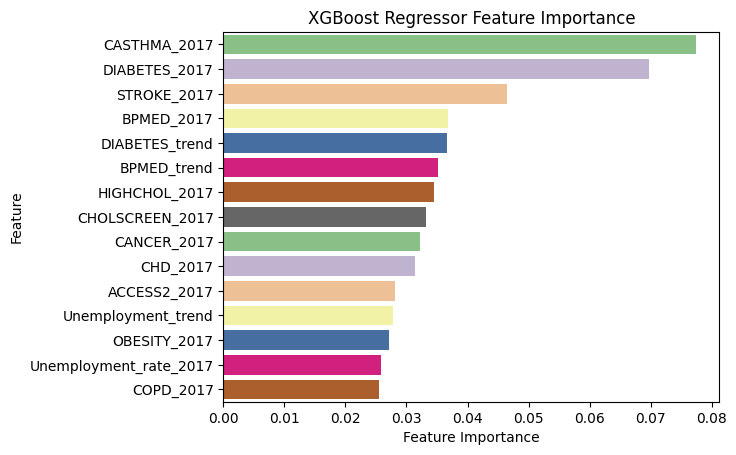

In [33]:
plot_feature_importance(xgb_model.feature_importances_, numerical_features, 'XGBoost Regressor', 15)